In [76]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn
from pprint import pprint
import time

In [77]:
def vary_model_hyperparameter(train_function, test_function, parameter_values, \
                              X_train: pd.DataFrame, y_train, X_val: pd.DataFrame, \
                              y_val):

    models = []
    results_train = []
    for index, value in enumerate(parameter_values):
        startTime = time.time()
        model, result = train_function(value, X_train, y_train)
        results_train.append((result, time.time() - startTime))
        models.append(model)
    
    results_test = []
    for model in models:
        startTime = time.time()
        result = test_function(model, X_val, y_val)
        results_test.append((result, time.time() - startTime))

    return {"models": models, "train results": results_train, "test results": results_test, "parameters": parameter_values}

# Models

## Light GMB: Max Depth

In [78]:
import lightgbm as lgb

def lightGMBTrain(parameter, X_train, y_train):
    clf = lgb.LGBMClassifier(max_depth = parameter)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_train)
    result = sklearn.metrics.accuracy_score(y_pred, y_train)
    return clf, result

def lightGMBTest(model, X_val, y_val):
    y_pred = model.predict(X_val)
    result = sklearn.metrics.accuracy_score(y_pred, y_val)
    return result

## Random Forest: Max Depth

In [79]:
from sklearn.ensemble import RandomForestClassifier

def randomForestTrain(parameter, X_train, y_train):
    forest = RandomForestClassifier(max_depth=parameter)
    forest.fit(X_train, y_train)
    y_pred = forest.predict(X_train)
    result = sklearn.metrics.accuracy_score(y_pred, y_train)
    return forest, result

def randomForestTest(model, X_val, y_val):
    y_pred = model.predict(X_val)
    result = sklearn.metrics.accuracy_score(y_pred, y_val)
    return result

## Random Forest: Number of Trees

In [80]:
from sklearn.ensemble import RandomForestClassifier

def randomForestBTrain(parameter, X_train, y_train):
    forest = RandomForestClassifier(n_estimators=parameter)
    forest.fit(X_train, y_train)
    y_pred = forest.predict(X_train)
    result = sklearn.metrics.accuracy_score(y_pred, y_train)
    return forest, result

def randomForestBTest(model, X_val, y_val):
    y_pred = model.predict(X_val)
    result = sklearn.metrics.accuracy_score(y_pred, y_val)
    return result

# Data Preparation

In [81]:
data = pd.read_csv("RT_IOT2022.csv")
data = data.drop("Unnamed: 0", axis=1)
y = data.Attack_type
X = data.select_dtypes(np.number)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Trainings and Evaluations

## Light GMB Training and Evaluation

In [82]:
result_dictionary = vary_model_hyperparameter(lightGMBTrain, lightGMBTest, [2,4,8,16,32,64], X_train=X_train, y_train=y_train, X_val=X_test, y_val=y_test)
pprint(result_dictionary)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008804 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13971
[LightGBM] [Info] Number of data points in the train set: 82488, number of used features: 80
[LightGBM] [Info] Start training from score -2.761114
[LightGBM] [Info] Start training from score -5.412325
[LightGBM] [Info] Start training from score -0.263662
[LightGBM] [Info] Start training from score -3.393445
[LightGBM] [Info] Start training from score -8.062312
[LightGBM] [Info] Start training from score -8.275886
[LightGBM] [Info] Start training from score -4.131995
[LightGBM] [Info] Start training from score -4.834247
[LightGBM] [Info] Start training from score -3.848476
[LightGBM] [Info] Start training from score -4.109590
[LightGBM] [Info] Start training from score -2.714838
[LightGBM] [Info] Start training from score -6.22665

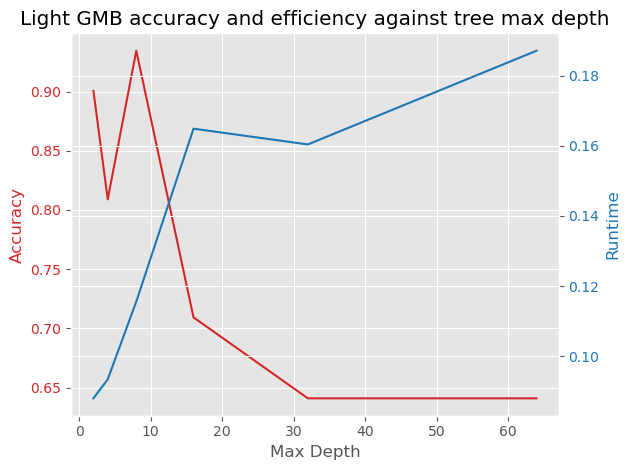

In [83]:
fig, ax1 = plt.subplots()

parameters = result_dictionary["parameters"]

plt.style.use("ggplot")
color = 'tab:red'
ax1.set_xlabel('Max Depth')
ax1.set_title("Light GMB accuracy and efficiency against tree max depth")
ax1.set_ylabel('Accuracy', color=color)
ax1.plot(parameters, [i[0] for i in result_dictionary["test results"]], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Runtime', color=color)  # we already handled the x-label with ax1
ax2.plot(parameters, [i[1] for i in result_dictionary["test results"]], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

## Random Forest: Max Depth Training and Evaluation

{'models': [RandomForestClassifier(max_depth=2),
            RandomForestClassifier(max_depth=4),
            RandomForestClassifier(max_depth=6),
            RandomForestClassifier(max_depth=8),
            RandomForestClassifier(max_depth=10),
            RandomForestClassifier(max_depth=16),
            RandomForestClassifier(max_depth=32),
            RandomForestClassifier(max_depth=45),
            RandomForestClassifier(max_depth=64),
            RandomForestClassifier(max_depth=128)],
 'parameters': [2, 4, 6, 8, 10, 16, 32, 45, 64, 128],
 'test results': [(0.88759260626646, 0.14822673797607422),
                  (0.9834354771222525, 0.15872526168823242),
                  (0.993305274557582, 0.16770100593566895),
                  (0.9964557335893082, 0.18251299858093262),
                  (0.9975387038814639, 0.1712040901184082),
                  (0.9977602205321322, 0.1745281219482422),
                  (0.9977848334933176, 0.1775519847869873),
                  (0.997907

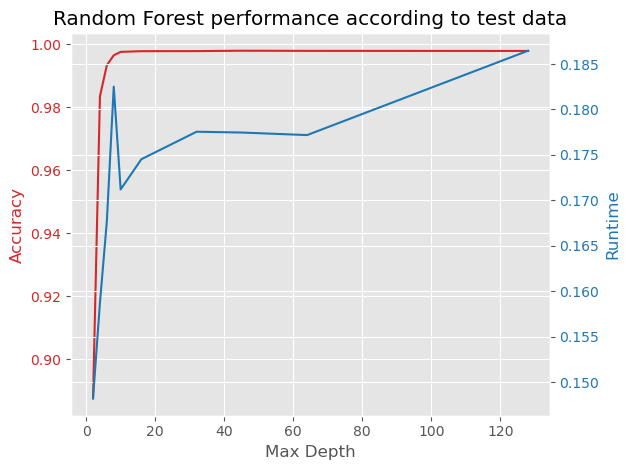

In [87]:
result_dictionary = vary_model_hyperparameter(randomForestTrain, randomForestTest, [2,4,6,8,10,16,32,45,64,128], X_train=X_train, y_train=y_train, X_val=X_test, y_val=y_test)
pprint(result_dictionary)

fig, ax1 = plt.subplots()

parameters = result_dictionary["parameters"]

plt.style.use("ggplot")
color = 'tab:red'
ax1.set_xlabel('Max Depth')
ax1.set_title("Random Forest performance according to test data")
ax1.set_ylabel('Accuracy', color=color)
ax1.plot(parameters, [i[0] for i in result_dictionary["test results"]], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Runtime', color=color)  # we already handled the x-label with ax1
ax2.plot(parameters, [i[1] for i in result_dictionary["test results"]], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

## Random Forest: N-Trees Training and Evaluation

{'models': [RandomForestClassifier(n_estimators=2),
            RandomForestClassifier(n_estimators=4),
            RandomForestClassifier(n_estimators=8),
            RandomForestClassifier(n_estimators=16),
            RandomForestClassifier(n_estimators=32),
            RandomForestClassifier(n_estimators=45),
            RandomForestClassifier(n_estimators=64),
            RandomForestClassifier(n_estimators=128)],
 'parameters': [2, 4, 8, 16, 32, 45, 64, 128],
 'test results': [(0.9960127002879716, 0.0338749885559082),
                  (0.9973910261143518, 0.03663206100463867),
                  (0.9972925742696104, 0.042456865310668945),
                  (0.997809446454503, 0.054650306701660156),
                  (0.9978586723768736, 0.07786798477172852),
                  (0.9979817371828005, 0.10275101661682129),
                  (0.9979571242216151, 0.12975478172302246),
                  (0.9979571242216151, 0.22366809844970703)],
 'train results': [(0.9983027834351663, 0

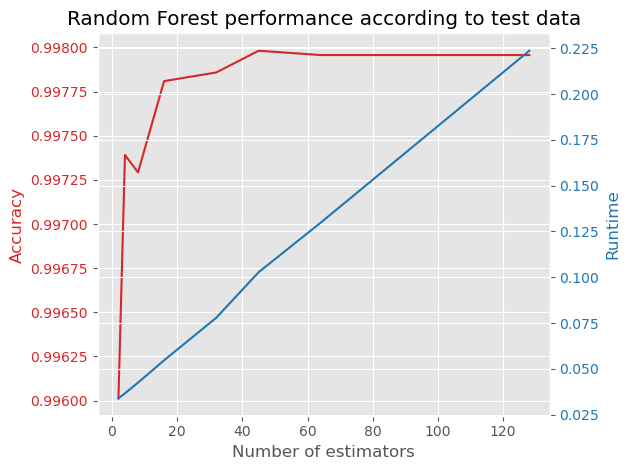

In [86]:
result_dictionary = vary_model_hyperparameter(randomForestBTrain, randomForestBTest, [2,4,8,16,32,45,64,128], X_train=X_train, y_train=y_train, X_val=X_test, y_val=y_test)
pprint(result_dictionary)

fig, ax1 = plt.subplots()

parameters = result_dictionary["parameters"]

plt.style.use("ggplot")
color = 'tab:red'
ax1.set_xlabel('Number of estimators')
ax1.set_title("Random Forest performance according to test data")
ax1.set_ylabel('Accuracy', color=color)
ax1.plot(parameters, [i[0] for i in result_dictionary["test results"]], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Runtime', color=color)  # we already handled the x-label with ax1
ax2.plot(parameters, [i[1] for i in result_dictionary["test results"]], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()